Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np
import importlib

Comparing to the Neutron-Nucleus Process
========================================

Converting to keV$_{\mathrm{nr}}$
---------------------------------

In [16]:
#create a yield model
import lindhard as lind
importlib.reload(lind)

from scipy.interpolate import CubicSpline

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar)
ylind = lind.getLindhard(lpar)
ylind = lind.getLindhardSi_k(0.15)
yplind = lind.getYPrimeLindhard(par=lpar)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV
yplindv = np.vectorize(yplind) #careful, this expects inputs in eV

Er=np.linspace(0.0,1000,1000)
grad=np.gradient(ylindv(Er))
fgrad = CubicSpline(Er,grad)

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


[7.92387442e-05 7.92873439e-05 7.93845962e-05 7.94819541e-05
 7.95794177e-05 7.96769873e-05 7.97746627e-05 7.98724443e-05
 7.99703319e-05 8.00683258e-05 8.01664260e-05 8.02646326e-05
 8.03629457e-05 8.04613654e-05 8.05598917e-05 8.06585249e-05
 8.07572649e-05 8.08561119e-05 8.09550659e-05 8.10541271e-05
 8.11532955e-05 8.12525713e-05 8.13519545e-05 8.14514451e-05
 8.15510434e-05 8.16507495e-05 8.17505633e-05 8.18504849e-05
 8.19505146e-05 8.20506524e-05 8.21508983e-05 8.22512525e-05
 8.23517150e-05 8.24522860e-05 8.25529655e-05 8.26537537e-05
 8.27546506e-05 8.28556563e-05 8.29567710e-05 8.30579947e-05
 8.31593275e-05 8.32607695e-05 8.33623208e-05 8.34639815e-05
 8.35657517e-05 8.36676314e-05 8.37696209e-05 8.38717201e-05
 8.39739292e-05 8.40762483e-05 8.41786774e-05 8.42812167e-05
 8.43838663e-05 8.44866262e-05 8.45894966e-05 8.46924775e-05
 8.47955690e-05 8.48987713e-05 8.50020844e-05 8.51055085e-05
 8.52090436e-05 8.53126898e-05 8.54164472e-05 8.55203160e-05
 8.56242962e-05 8.572838

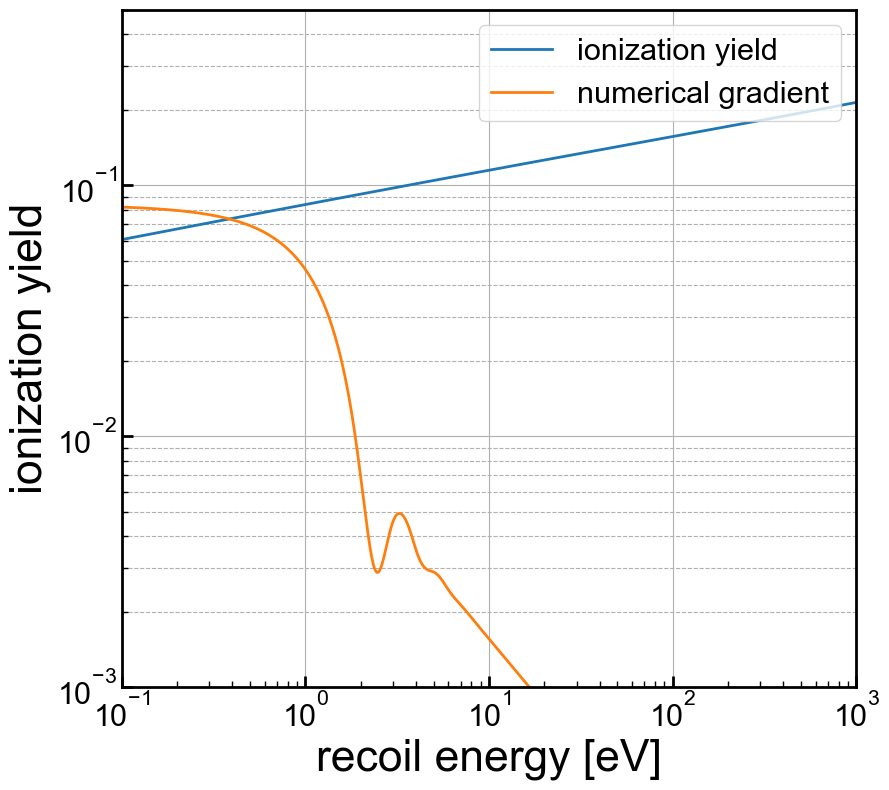

In [17]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

Er= np.geomspace(0.1, 1000, 1000)

#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er, ylindv(Er),label="ionization yield")
#ax1.plot(Er, yplindv(Er),label="derivative ionization yield")
ax1.plot(Er, fgrad(Er),label="numerical gradient")
print(np.gradient(ylindv(Er)))



ymin = 0.001
ymax = 0.5

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.1, 1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [eV]')
ax1.set_ylabel('ionization yield')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/ne-recspec-Eee.png')
plt.show()